<a href="https://colab.research.google.com/github/RobinaMalik/machine-Learning/blob/main/multiple_regression_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


Load titanic data

In [ ]:

df = pd.read_csv("titanic.csv")
df.head(6)





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Use relevant columns and drop missing values

In [ ]:

df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

 Step 3: Define Features and Target

In [ ]:

X = df[['Pclass', 'Age', 'SibSp', 'Parch']]
y = df['Fare']




 Step 4: Split Data into Train and Test

In [ ]:
# ✂️ Step 4: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Step 5: Apply StandardScaler

In [ ]:
# 📏 Step 5: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Step 6: Fit Multiple Linear Regression Model

In [ ]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

 Step 7: Predict and Evaluate

In [ ]:

y_pred = model.predict(X_test_scaled)

# R² Score (Mean Score / Accuracy)
r2 = r2_score(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Intercept
intercept = model.intercept_

# Coefficients
coefficients = model.coef_
features = X.columns

# 📊 Print Results
print("R² Score (Accuracy):", r2)
print("Mean Squared Error:", mse)
print("Intercept:", intercept)

print("\nFeature Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")


R² Score (Accuracy): 0.17743677322314544
Mean Squared Error: 3424.568518161756
Intercept: 35.078560420315235

Feature Coefficients:
Pclass: -31.083676766679876
Age: -2.598884355616281
SibSp: 5.82384086206544
Parch: 10.53349329075405


 Step 8: Plot Actual vs Predicted Fare

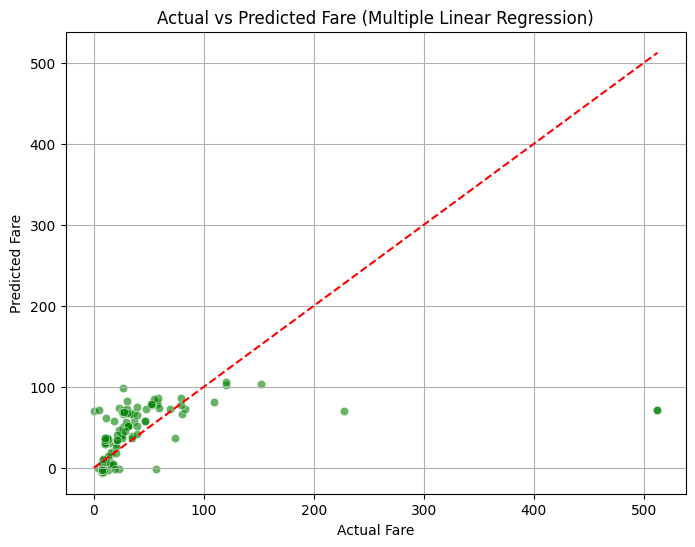

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare (Multiple Linear Regression)")
plt.grid(True)
plt.show()
